## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharm_merge = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
pharm_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
pharm_merge["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = pharm_merge[pharm_merge.duplicated(["Mouse ID", "Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pharm = pharm_merge[pharm_merge["Mouse ID"] != 'g989']


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_pharm["Mouse ID"].count()

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_mean = clean_pharm.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
regimen_median = clean_pharm.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
regimen_var = clean_pharm.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
regimen_std = clean_pharm.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
regimen_sem = clean_pharm.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

summary_stat = pd.DataFrame({"Tumor Volume (mm3) Mean": regimen_mean,
                            "Tumor Volume (mm3) Median": regimen_median,
                            "Tumor Volume (mm3) Variance": regimen_var,
                            "Tumor Volume (mm3) Standard Deviation": regimen_std,
                            "Tumor Volume (mm3) SEM": regimen_sem
                            })
summary_stat

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary_stat_py = clean_pharm.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).rename(columns=
                                                                            {"mean": "Tumor Volume (mm3) Mean",
                                                                            "median": "Tumor Volume (mm3) Median",
                                                                            "var": "Tumor Volume (mm3) Variance",
                                                                            "std": "Tumor Volume (mm3) Standard Deviation",
                                                                            "sem": "Tumor Volume (mm3) SEM"})
summary_stat_py

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

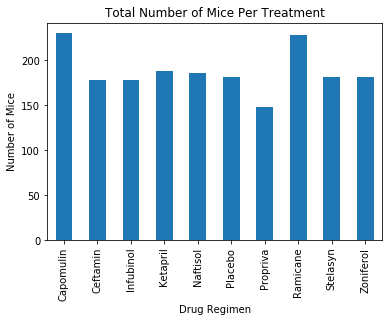

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. df.plot(kind=)
mice_count = clean_pharm.groupby('Drug Regimen')['Mouse ID'].count()
mice_treat_panda_plot = mice_count.plot(kind="bar")
mice_treat_panda_plot.set_xlabel("Drug Regimen")
mice_treat_panda_plot.set_ylabel("Number of Mice")
mice_treat_panda_plot.set_title("Total Number of Mice Per Treatment")
plt.show()

# Y LABEL NOT WORKING

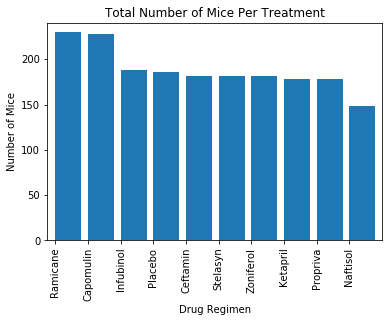

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_x = clean_pharm['Drug Regimen'].unique()
bar_height = clean_pharm['Drug Regimen'].value_counts()
plt.bar(bar_x, bar_height, align="edge")
plt.xticks(rotation="vertical")
plt.xlim(-0.25, len(bar_x))
plt.ylim(0, max(bar_height)+10)
plt.title("Total Number of Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


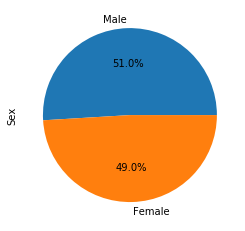

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_pharm['Sex'].value_counts()
mice_sex_panda_plot = mice_gender.plot(y="Number of Mice", kind="pie", autopct="%1.1f%%")
plt.show()

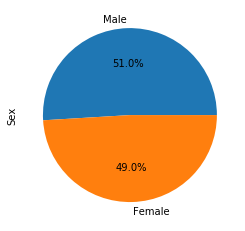

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_x = clean_pharm['Sex'].value_counts()
pie_label = clean_pharm['Sex'].unique()
plt.pie(pie_x, labels = pie_label, autopct="%1.1f%%", shadow=False)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_pharm.groupby(["Mouse ID"])["Timepoint"].last()
last_vol = clean_pharm.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
last_drug = clean_pharm.groupby(["Mouse ID"])["Drug Regimen"].last()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_1 = pd.merge(last_tp, last_vol, how="left", on=["Mouse ID"])
last_df = pd.merge(last_1, last_drug, how="left", on=["Mouse ID"])
last_df

,Timepoint,Tumor Volume (mm3),Drug Regimen
Mouse ID,,,
a203,45,67.973419,Infubinol
a251,45,65.525743,Infubinol
a262,45,70.717621,Placebo
a275,45,62.999356,Ceftamin
a366,30,63.440686,Stelasyn
...,...,...,...
z435,10,48.710661,Propriva
z578,45,30.638696,Ramicane
z581,45,62.754451,Infubinol


In [14]:
# Generated list for last timepoint tumor volume for each treatment
capomulin_tumor_vol_list = last_df[last_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane_tumor_vol_list = last_df[last_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol_tumor_vol_list = last_df[last_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin_tumor_vol_list = last_df[last_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
capomulin_tumor_vol_list

# Capomulin upper and lower quartile & IQR
cap_quartiles = capomulin_tumor_vol_list.quantile([0.25,.5,.75])
low_cap_q = cap_quartiles[0.25]
up_cap_q = cap_quartiles[0.75]
cap_iqr = up_cap_q-low_cap_q
print(f"Capomulin lower quartile is: {low_cap_q}")
print(f"Capomulin upper quartile is: {up_cap_q}")
print(f"Capomulin IQR is: {cap_iqr}")
print(f"Capomulin mean is: {cap_quartiles[0.5]}")

ram_quartiles = ramicane_tumor_vol_list.quantile([0.25,.5,.75])
low_ram_q = ram_quartiles[0.25]
up_ram_q = ram_quartiles[0.75]
ram_iqr = up_ram_q-low_ram_q
print(f"Ramicane lower quartile is: {low_ram_q}")
print(f"Ramicane upper quartile is: {up_ram_q}")
print(f"Ramicane IQR is: {ram_iqr}")
print(f"Ramicane median is: {ram_quartiles[0.5]}")

inf_quartiles = infubinol_tumor_vol_list.quantile([0.25,.5,.75])
low_inf_q = inf_quartiles[0.25]
up_inf_q = inf_quartiles[0.75]
inf_iqr = up_inf_q-low_inf_q
print(f"Infubinol lower quartile is: {low_inf_q}")
print(f"Infubinol upper quartile is: {up_inf_q}")
print(f"Infubinol IQR is: {inf_iqr}")
print(f"Infubinol median is: {inf_quartiles[0.5]}")

cef_quartiles = ceftamin_tumor_vol_list.quantile([0.25,.5,.75])
low_cef_q = cef_quartiles[0.25]
up_cef_q = cef_quartiles[0.75]
cef_iqr = up_cef_q-low_cef_q
print(f"Ceftamin lower quartile is: {low_cef_q}")
print(f"Ceftamin upper quartile is: {up_cef_q}")
print(f"Ceftamin IQR is: {cef_iqr}")
print(f"Ceftamin median is: {cef_quartiles[0.5]}")   
    
#Determine outliers using upper and lower bounds
cap_low_b = low_cap_q - (1.5*cap_iqr)
cap_up_b = up_cap_q + (1.5*cap_iqr)

ram_low_b = low_ram_q - (1.5*ram_iqr)
ram_up_b = up_ram_q + (1.5*ram_iqr)

inf_low_b = low_inf_q - (1.5*inf_iqr)
inf_up_b = up_inf_q + (1.5*inf_iqr)

cef_low_b = low_cef_q - (1.5*cef_iqr)
cef_up_b = up_cef_q + (1.5*cef_iqr)


cap_outlier = [value for value in capomulin_tumor_vol_list if value < cap_low_b or value > cap_up_b]
print(f"The outlier for Capomulin is {cap_outlier}.")
ram_outlier = [value for value in ramicane_tumor_vol_list if value < ram_low_b or value > ram_up_b]
print(f"The outlier for Ramicane is {ram_outlier}.")
inf_outlier = [value for value in infubinol_tumor_vol_list if value < inf_low_b or value > inf_up_b]
print(f"The outlier for Infubinol is {inf_outlier}.")
cef_outlier = [value for value in ceftamin_tumor_vol_list if value < cef_low_b or value > cef_up_b]
print(f"The outlier for Ceftamin is {cef_outlier}.")

Capomulin lower quartile is: 32.37735684
Capomulin upper quartile is: 40.1592203
Capomulin IQR is: 7.781863460000004
Capomulin median is: 38.125164399999996
Ramicane lower quartile is: 31.56046955
Ramicane upper quartile is: 40.65900627
Ramicane IQR is: 9.098536719999998
Ramicane median is: 36.56165229
Infubinol lower quartile is: 54.04860769
Infubinol upper quartile is: 65.52574285
Infubinol IQR is: 11.477135160000003
Infubinol median is: 60.16518046
Ceftamin lower quartile is: 48.72207785
Ceftamin upper quartile is: 64.29983003
Ceftamin IQR is: 15.577752179999997
Ceftamin median is: 59.85195552
The outlier for Capomulin is [].
The outlier for Ramicane is [].
The outlier for Infubinol is [36.321345799999996].
The outlier for Ceftamin is [].


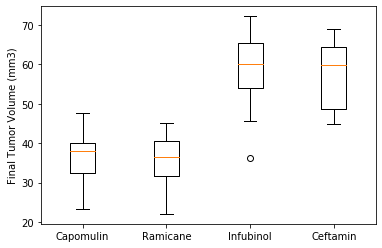

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# 

fig1, ax = plt.subplots()
ax.boxplot(capomulin_tumor_vol_list, positions = [1], widths = 0.3)
ax.boxplot(ramicane_tumor_vol_list, positions = [2], widths = 0.3)
ax.boxplot(infubinol_tumor_vol_list, positions = [3], widths = 0.3)
ax.boxplot(ceftamin_tumor_vol_list, positions = [4], widths = 0.3)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

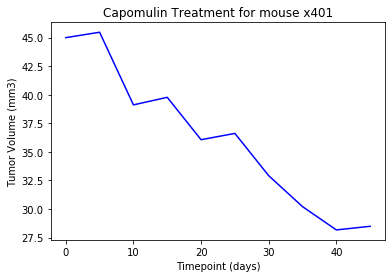

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse(ONE MOUSE) treated with Capomulin
cap_pull = clean_pharm[clean_pharm["Drug Regimen"] == "Capomulin"]["Mouse ID"]
cap_mouse = clean_pharm.loc[clean_pharm["Mouse ID"]=='x401']
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"], color="blue")
plt.title("Capomulin Treatment for mouse x401")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


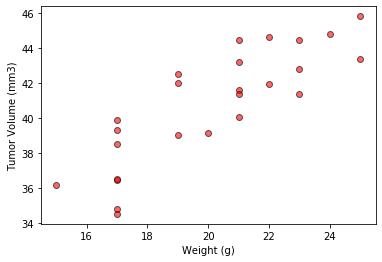

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen.
# loc on capomulin, Grpby mouse id, mean weight and tumor volume.
capo_scat_pull = clean_pharm.loc[clean_pharm["Drug Regimen"]=="Capomulin"]
capo_wt_mean = capo_scat_pull.groupby(["Mouse ID"]).mean()["Weight (g)"]
capo_tum_mean = capo_scat_pull.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
capo_scat = pd.merge(capo_wt_mean, capo_tum_mean, how="left", on=["Mouse ID"])
plt.scatter(capo_scat["Weight (g)"], capo_scat["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", alpha=0.6)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

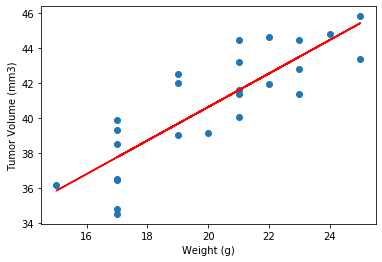

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_val = capo_scat["Weight (g)"]
y_val = capo_scat["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()